In [3]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from dotenv import load_dotenv
import os
from pathlib import Path
import nibabel as nib

In [4]:
load_dotenv()
data_dir = Path(os.getenv("ORIG_DIR"))

NameError: name 'mask' is not defined

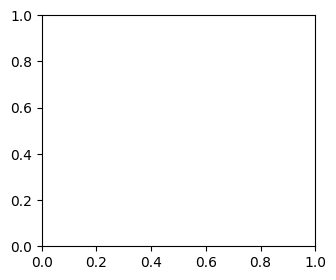

In [5]:
mask_channels = ['necrotic core', 'edema', 'enhancing tumor']
plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(mask[:,:,i], cmap='gray')
    plt.title(mask_channels[i])
    plt.axis('off')
plt.show()

In [ ]:
for sub_dir in data_dir.iterdir():
    if sub_dir.is_dir():
        for file_path in sub_dir.iterdir():
            img = nib.load(str(file_path))
            data = img.get_fdata()
            print(data.shape)
            break
        break

(512, 512, 176)


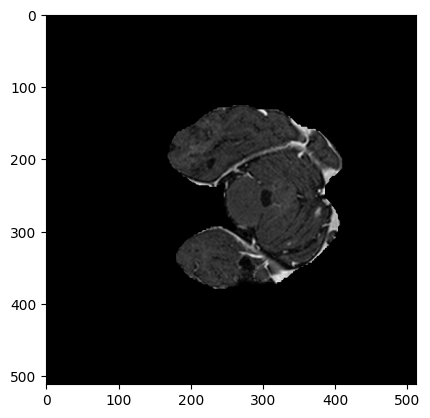

In [7]:
image_dir = data_dir / "BCBM-RadioGenomics-0-0" / "BCBM-RadioGenomics-0-0_image_ss_n4.nii.gz"
mask_dir = data_dir / "BCBM-RadioGenomics-0-0" / "BCBM-RadioGenomics-0-0_mask_R-sylvian-tumor.nii.gz"
img = nib.load(str(image_dir)).get_fdata()
mask = nib.load(str(mask_dir)).get_fdata()
plt.imshow(img[:,:,60], cmap='gray')

C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_bst.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_Inferior-vermis-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-ant-frontal-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-caudate.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-frontal-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-inf-cerebellar-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-lat-inf-cerebllr-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-lat-post-crbllr-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-occipal.nii.gz
C:\Users\

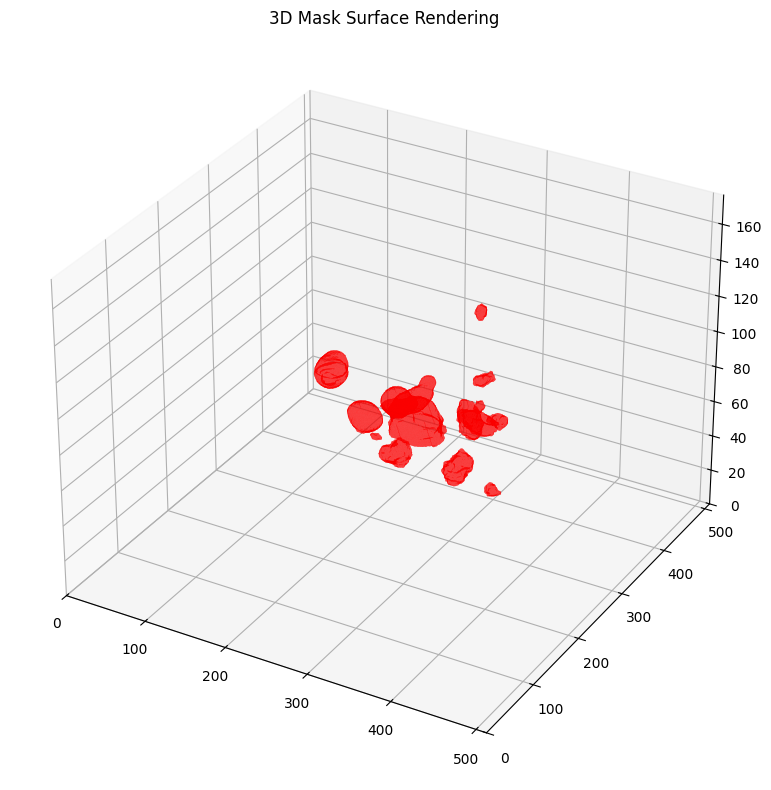

In [8]:
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import napari

cur_dir = data_dir / "BCBM-RadioGenomics-0-1"
mask = None
for file_path in cur_dir.iterdir():
    if "image" not in str(file_path):
        print(file_path)
        cur_mask = nib.load(str(file_path)).get_fdata()
        if mask is None:
            mask = cur_mask
        else:
            mask = mask + cur_mask


# Assume mask is a binary 3D NumPy array (shape: H x W x D)
verts, faces, _, _ = marching_cubes(mask, level=0.5)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces], alpha=0.6)
mesh.set_facecolor('red')
ax.add_collection3d(mesh)

ax.set_xlim(0, mask.shape[0])
ax.set_ylim(0, mask.shape[1])
ax.set_zlim(0, mask.shape[2])
ax.set_title("3D Mask Surface Rendering")
plt.tight_layout()
plt.show()

In [ ]:
# Load your 3D mask or image (e.g., shape: (512, 512, 176))
volume = img

# Start viewer
viewer = napari.Viewer()
viewer.add_image(img, name='MRI', colormap='gray', rendering='mip')  # or 'iso', 'attenuated_mip'
cur_dir = data_dir / "BCBM-RadioGenomics-1-0"
for file_path in cur_dir.iterdir():
    if "image" not in str(file_path):
        print(file_path)
        mask = nib.load(str(file_path)).get_fdata()
        mask = (mask > 0).astype(np.uint8)
        viewer.add_labels(mask, name=file_path.stem) 
napari.run()

C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_bst.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_Inferior-vermis-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-ant-frontal-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-caudate.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-frontal-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-inf-cerebellar-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-lat-inf-cerebllr-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-lat-post-crbllr-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-0-1\BCBM-RadioGenomics-0-1_mask_L-occipal.nii.gz
C:\Users\